# Uber Trips Analysis

## Case Study

By analyzing Uber trips, we can draw many patterns like which day has the highest and the lowest trips or the busiest hour for Uber and many other patterns. The dataset is based on Uber trips from New York, a city with a very complex transportation system with a large residential community.

In [2]:
# required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category = UserWarning)

* Click [here](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/uber-raw-data-sep14.csv) to download the dataset.

In [3]:
dataset = 'https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/uber-raw-data-sep14.csv'
df= pd.read_csv(dataset)
df.head(10)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
5,9/1/2014 0:12:00,40.6735,-73.9918,B02512
6,9/1/2014 0:15:00,40.7471,-73.6472,B02512
7,9/1/2014 0:16:00,40.6613,-74.2691,B02512
8,9/1/2014 0:32:00,40.3745,-73.9999,B02512
9,9/1/2014 0:33:00,40.7633,-73.9773,B02512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [5]:
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)

In [6]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [7]:
df['Day'] = df['Date/Time'].apply(lambda x: x.day)
df['Weekday'] = df['Date/Time'].apply(lambda x: x.weekday())
df['Hour'] = df['Date/Time'].apply(lambda x: x.hour)
df.head(10)

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
5,2014-09-01 00:12:00,40.6735,-73.9918,B02512,1,0,0
6,2014-09-01 00:15:00,40.7471,-73.6472,B02512,1,0,0
7,2014-09-01 00:16:00,40.6613,-74.2691,B02512,1,0,0
8,2014-09-01 00:32:00,40.3745,-73.9999,B02512,1,0,0
9,2014-09-01 00:33:00,40.7633,-73.9773,B02512,1,0,0


In [8]:
df.tail(10)

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
1028126,2014-09-30 22:56:00,40.7371,-74.0289,B02764,30,1,22
1028127,2014-09-30 22:56:00,40.6446,-73.7823,B02764,30,1,22
1028128,2014-09-30 22:56:00,40.7163,-73.9623,B02764,30,1,22
1028129,2014-09-30 22:57:00,40.6979,-73.9365,B02764,30,1,22
1028130,2014-09-30 22:57:00,40.7300,-73.9565,B02764,30,1,22
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,1,22


## Data Analysis

* Let’s have a look at each day to see on which day the Uber trips were highest:

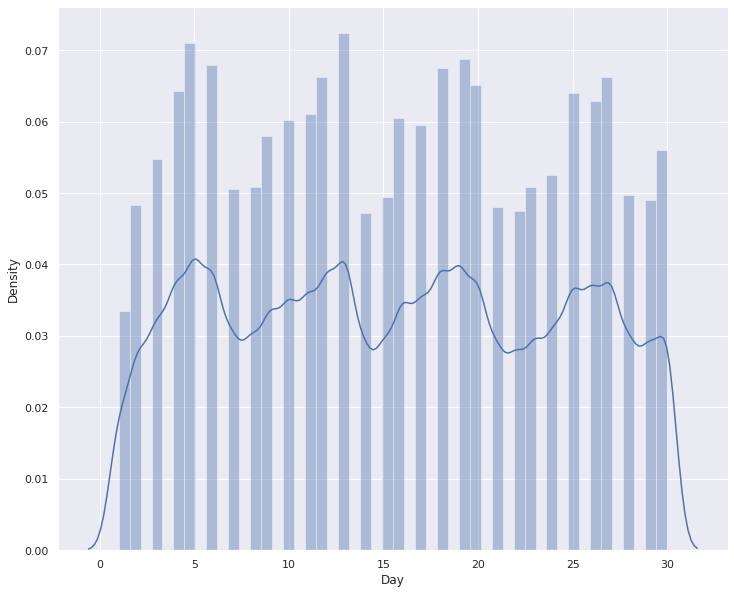

In [9]:
sns.set(rc = {'figure.figsize': (12, 10)})
sns.distplot(df['Day']);

* By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends. Now let’s analyze the Uber trips according to the hours:

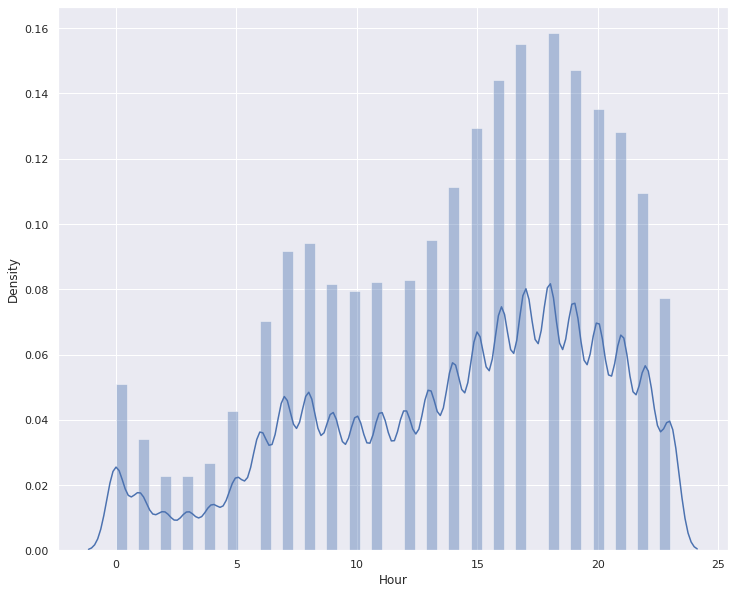

In [10]:
sns.distplot(df['Hour']);

* According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing. Now let’s analyze the Uber trips according to the weekdays:

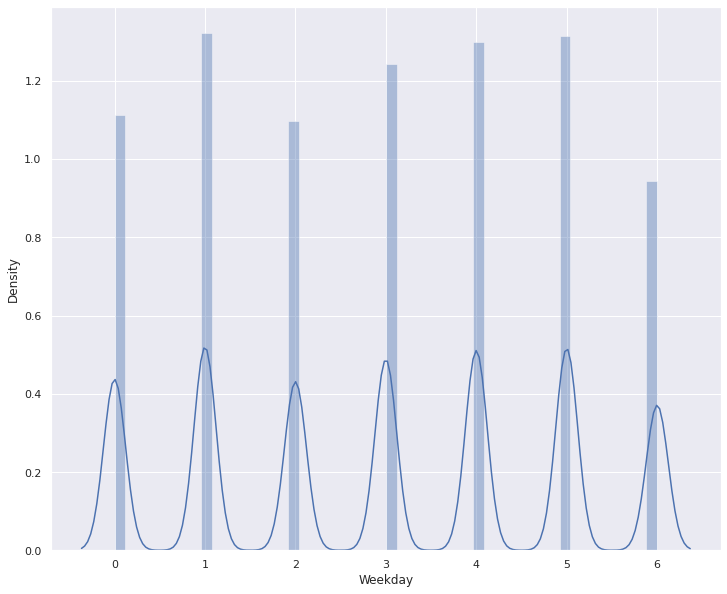

In [11]:
sns.distplot(df['Weekday']);

* In the above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest. Now let’s have a look at the correlation of hours and weekdays on the Uber trips:

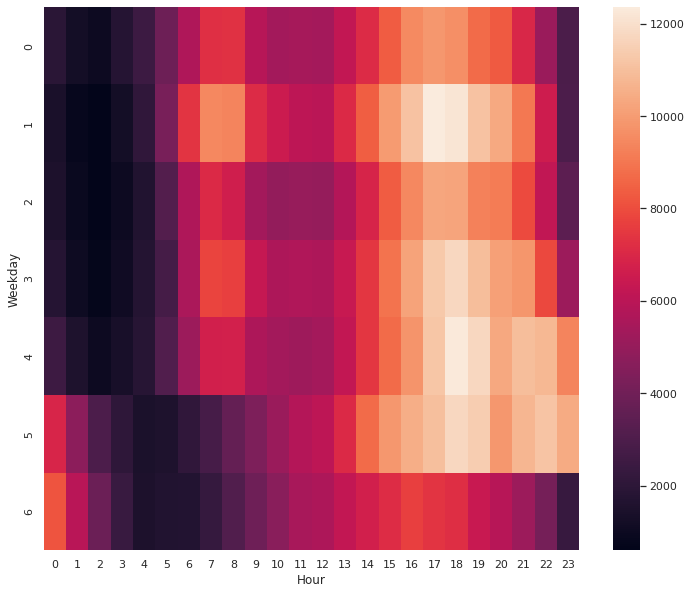

In [12]:
# correlation of weekday and hour
a = df.groupby(['Weekday', 'Hour']).apply(lambda x: len(x))
a = a.unstack()
sns.heatmap(a, annot = False);

* As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


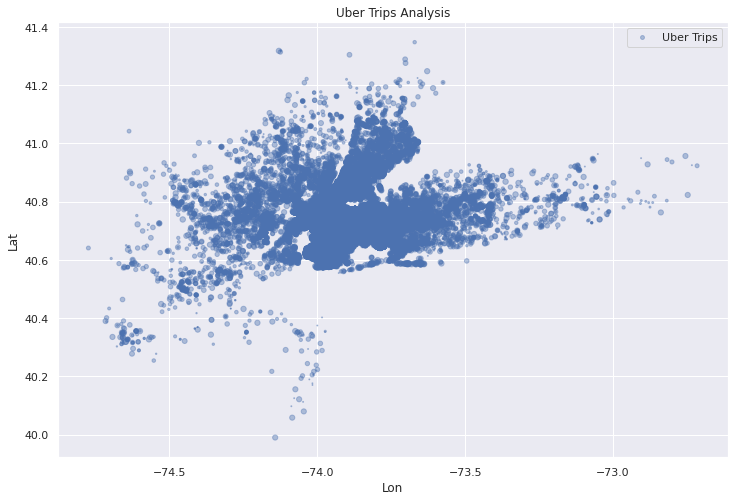

In [13]:
df.plot(kind = 'scatter', x = 'Lon', y = 'Lat', alpha = 0.4, s = df['Day'], label = 'Uber Trips',
       figsize = (12, 8), cmap = plt.get_cmap('jet'))
plt.title('Uber Trips Analysis')
plt.legend()
plt.show()

## Summary

So this is how we can analyze the Uber trips for New York City. Some of the conclusions this analysis are:

1. Monday is the most profitable day for Uber
2. On Saturdays less number of people use Uber
3. 6 pm is the busiest day for Uber
4. On average a rise in Uber trips start around 5 am.
5. Most of the Uber trips originate near the Manhattan region in New York.